101
50
105
256


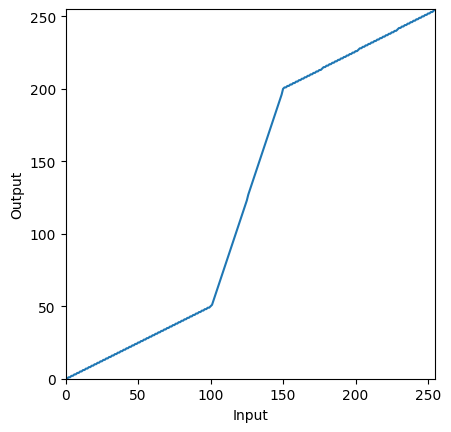

In [ ]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input')
ax.set_ylabel('Output')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()


# img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", img_orig)
# cv.waitKey(0)
# image_transformed = cv.LUT(img_orig, transform)
# cv.imshow("Image", image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()

51
100
106
255


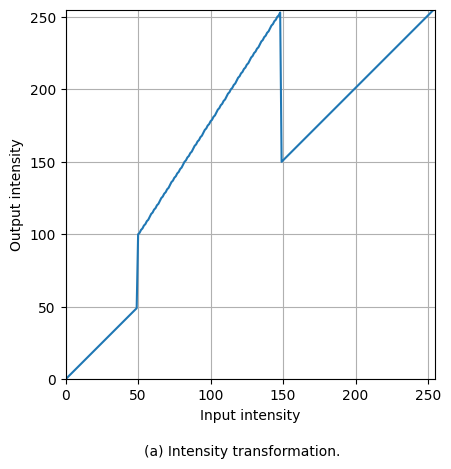

error: OpenCV(4.12.0) /io/opencv/modules/core/src/lut.cpp:159: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'LUT'


In [30]:
import numpy as np
import matplotlib.pyplot as plt


points = np.array([(0, 0), (50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(points[0,1], points[1,1], points[1,0] - points[0,0] + 1)
print(len(t1))

t2 = np.linspace(points[2,1], points[3,1], points[3,0] - points[2,0])
print(len(t2))

t3 = np.linspace(points[4,1], points[5,1], points[5,0] - points[4,0] + 1)
print(len(t3))

transform = np.concatenate((t1[:-1], t2[:-1], t3)).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid(True)
plt.figtext(0.5, -0.05, '(a) Intensity transformation.', ha='center')
plt.show()

img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[0].set_title('Transformed Image')

Segment lengths: 51, 101, 106
Total length: 258
Final LUT size: 256


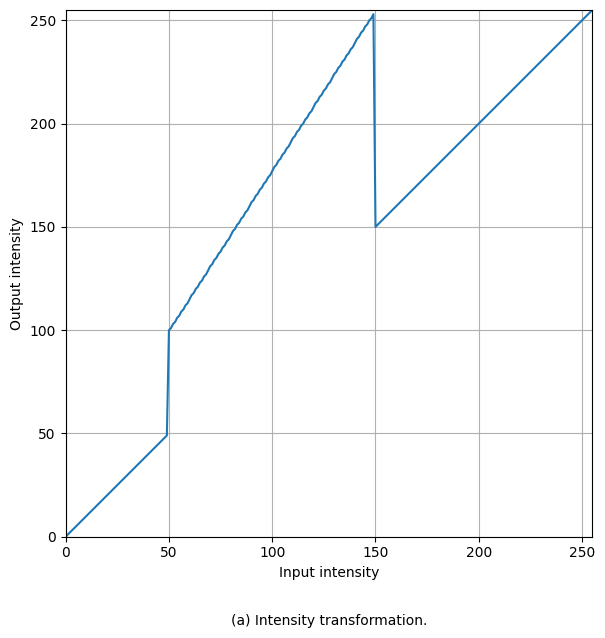

error: OpenCV(4.12.0) /io/opencv/modules/core/src/matrix.cpp:747: error: (-215:Assertion failed) m.dims >= 2 in function 'Mat'


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

points = np.array([(0, 0), (50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])


t1 = np.linspace(points[0,1], points[1,1], points[1,0] - points[0,0] + 1, dtype=np.uint8)
t2 = np.linspace(points[2,1], points[3,1], points[3,0] - points[2,0] + 1, dtype=np.uint8)
t3 = np.linspace(points[4,1], points[5,1], points[5,0] - points[4,0] + 1, dtype=np.uint8)

print(f"Segment lengths: {len(t1)}, {len(t2)}, {len(t3)}")
print(f"Total length: {len(t1) + len(t2) + len(t3)}")


transform = np.zeros(256, dtype=np.uint8)
transform[0:51] = t1
transform[50:151] = t2
transform[150:256] = t3

print(f"Final LUT size: {len(transform)}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid(True)
plt.figtext(0.5, -0.05, '(a) Intensity transformation.', ha='center')
plt.tight_layout()
plt.show()

img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[0].set_title('Transformed Image')